In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def euler_sde(x, t, f, s, h):
    '''
    One step of Euler-Mayruyama scheme
    '''
    
    if callable(f): f = f(x, t)
    if callable(s): s = s(x, t)
        
    e = np.random.randn(*x.shape)
    
    return x + h * f + np.sqrt(h) * s * e

In [3]:
a = np.array([1., 2.])
w = np.array([1., np.pi/2])
p = np.array([np.pi/4., np.pi/2])

t_min = 0.
t_max = 10.
n_poi = 10000
t_list = np.linspace(t_min, t_max, n_poi)
h = (t_max - t_min) / (n_poi - 1)

def x_func(t):
    return a * np.sin(w*t + p)

def f_func(x, t):
    return a * w * np.cos(w*t + p)

x0 = np.array(x_func(t_list[0]))

In [4]:
x_real0 = np.array([x_func(t) for t in t_list])
x_calc1 = odeint(f_func, x0, t_list)
x_calc2 = []

x = x0
x_calc2.append(x)

for t in t_list[:-1]:
    x = euler_sde(x, t, f_func, 0., h)
    x_calc2.append(x)
    
x_calc2 = np.array(x_calc2)

In [5]:
err1 = np.linalg.norm(x_real0 - x_calc1, axis=1)
err2 = np.linalg.norm(x_real0 - x_calc2, axis=1)

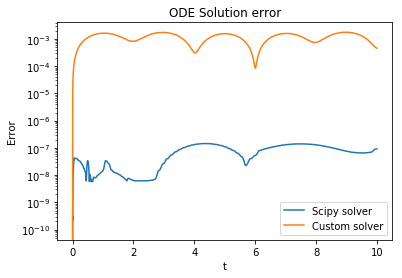

In [6]:
plt.plot(t_list, err1, label='Scipy solver')
plt.plot(t_list, err2, label='Custom solver')
plt.semilogy()
plt.title('ODE Solution error')
plt.xlabel('t')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [2]:
odeint?

Signature:
odeint(
    ['func', 'y0', 't', 'args=()', 'Dfun=None', 'col_deriv=0', 'full_output=0', 'ml=None', 'mu=None', 'rtol=None', 'atol=None', 'tcrit=None', 'h0=0.0', 'hmax=0.0', 'hmin=0.0', 'ixpr=0', 'mxstep=0', 'mxhnil=0', 'mxordn=12', 'mxords=5', 'printmessg=0', 'tfirst=False'],
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the function `scipy.integrate.solve_ivp`.  To use a 